# K-Means

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
data =pd.read_csv(r"/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


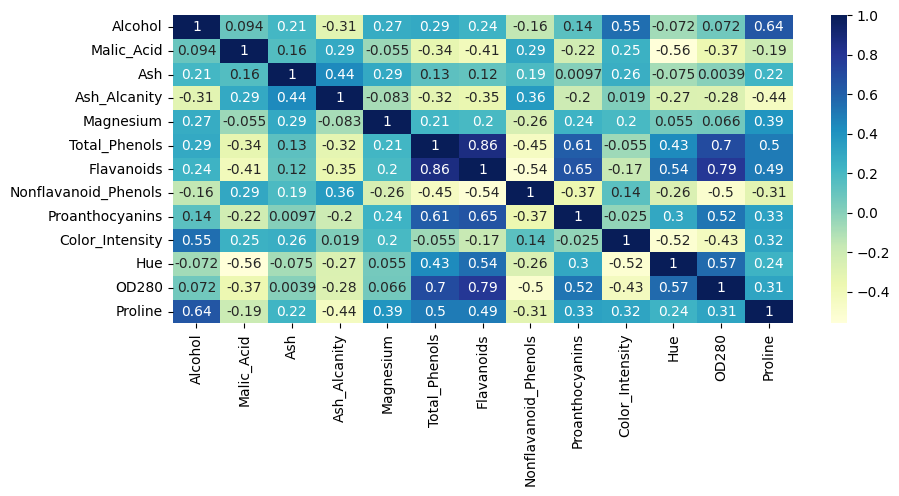

In [3]:
# let's check whether the featurse have any connections with each other 
fig, ax = plt.subplots(figsize=(10,4)) 
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True) 



In [4]:
# Kmeans for unsupervised learning

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=5).fit(data)
kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [5]:
# labeled data from the source 

%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


Note: you may need to restart the kernel to use updated packages.
{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semant

In [6]:
# replacing indexes in y to compare with k means  

yr=np.array(y.replace([ 2, 3],
[ 0, 2]))


In [7]:
# accuracy of k means 

count=0
for i in range (len(yr)):
    if yr[i]==kmeans.labels_[i]:
        count=count+1
count

accuracy=count/len(yr)

print('accuracy of k means is',accuracy )

accuracy of k means is 0.702247191011236


# Supervised

In [8]:
# running random forest on labeled data 

X = wine.data.features 
y = wine.data.targets 

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 9)
model = RandomForestClassifier(n_estimators= 7, max_depth=None, random_state=76)
model.fit(X_train,y_train)
    
# accuracy

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(model.predict(X_val),y_val):.4f}")


Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 1.0000


/tmp/ipykernel_18/1896016265.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


**1) Supervised algorithm (random forest) gives 100 % accuracy
**2) Unsupervised algorithm ( k means ) gives around 70 % accuracy****

# PCA

In [9]:
# PCA with 2 components 

data =pd.read_csv(r"/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
transformed_data=pca.fit_transform(data)

print(pca.explained_variance_ratio_)


[0.99809123 0.00173592]


In [10]:
transformed_data = pd.DataFrame(transformed_data,columns = ['principal_component_1','principal_component_2'])
transformed_data

,principal_component_1,principal_component_2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


Text(0, 0.5, 'principal_component_2')

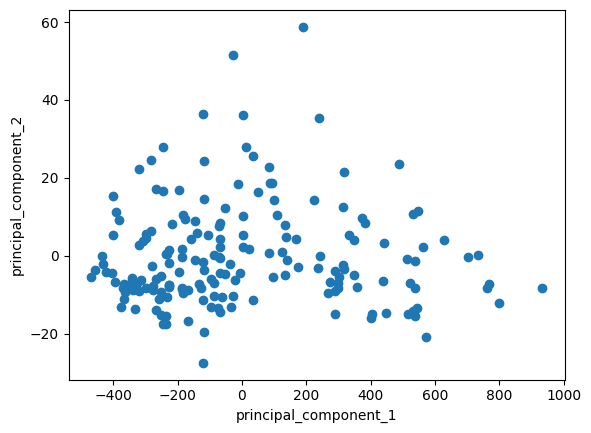

In [11]:
# principal components 1 and 2

plt.scatter(transformed_data['principal_component_1'], transformed_data['principal_component_2'])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')


Text(0, 0.5, 'principal_component_2')

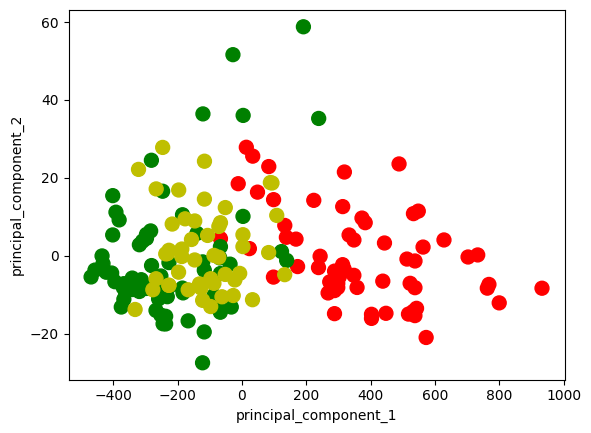

In [12]:
# comparing PCA with actual label 

y = wine.data.targets 
yr=y.replace([1,2,3],[0,1,2])

colormap = np.array(['r', 'g', 'y'])

plt.scatter(transformed_data['principal_component_1'], transformed_data['principal_component_2'], s=100, c=colormap[yr].flatten())
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')

In [13]:
# pca with 3 components 

pca=PCA(n_components=3)
transformed_data=pca.fit_transform(data)

print(pca.explained_variance_ratio_)

[9.98091230e-01 1.73591562e-03 9.49589576e-05]


In [14]:
transformed_data = pd.DataFrame(transformed_data,columns = ['principal_component_1','principal_component_2','principal_component_3'])
transformed_data

,principal_component_1,principal_component_2,principal_component_3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


Text(0.5, 0, 'principal_component_3')

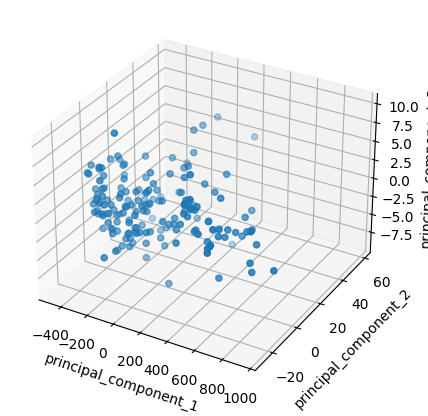

In [15]:
 # principal components 1, 2 and 3

from mpl_toolkits import mplot3d
ig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
ax.scatter3D(transformed_data['principal_component_1'], transformed_data['principal_component_2'],transformed_data['principal_component_3'])
ax.set_xlabel('principal_component_1')
ax.set_ylabel('principal_component_2')
ax.set_zlabel('principal_component_3')

In [16]:
# comparing PCA with actual label 

import plotly.express as px

transformed_data_plus_class=pd.concat([transformed_data, y],axis=1)
px.scatter_3d(transformed_data_plus_class, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3',color='class')
